## Генераванне выпадковай паслядоўнасці

In [1]:
import matplotlib.pyplot as plt
import math

def get_generic(a, R0, m):
    R = []
    generic = []
    for i in range(500000):
        if len(R) == 0:
            R.append(a * R0 % m)
        else:
            R.append(a * R[i-1] % m)
        generic.append(R[i] / m)
        
    return generic

def get_intervals(X):
    intervals = []

    values = []
    value = min(X)
    interval_value = (max(X) - min(X)) / 20
    for i in range(20):
        value += interval_value
        values.append(value)

    for i in range(len(X)):
        for j in range(20):
            if X[i] <= values[j]:
                intervals.append(values[j] - interval_value)
                break 
            
    return intervals

def find_m(X):
    m = 0
    for i in range(len(X)):
        m += X[i]
    m /= len(X)
    
    return m

def find_D(X, m):
    D = 0
    for i in range(len(X)):
        D += ((X[i] - m) ** 2)
    D /= (len(X) - 1)
    
    return D

def print_m_D_sigma(m, D):
    print("m* =", m)
    print("D* =", D)
    print("sigma* =", D ** 0.5)

## Раўнамернае размеркаванне

### Уваходныя параметры

In [35]:
a, b = input().split(" ")
a = int(a)
b = int(b)

-1 5


### Фармаванне размеркавання

In [36]:
X = []
generic = get_generic(50093, 50101, 50111)

for i in range(len(generic)):
    X.append(a + (b - a) * generic[i])

### Гістаграма

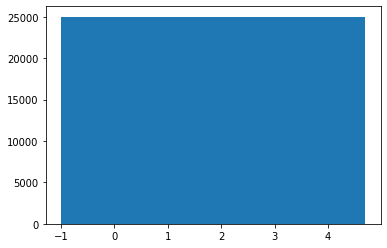

In [37]:
intervals = get_intervals(X)
    
plt.hist(intervals, bins=20)
plt.show()

### Ацэнкі матчакання, дысперсіі, СКА

In [40]:
print_m_D_sigma(find_m(X),
                find_D(X, find_m(X)))

m* = 1.999926076829461
D* = 2.9997257665038415
sigma* = 1.7319716413682533


## Гаўсаўскае размеркаванне

### Уваходныя параметры

In [65]:
m, sigma = input().split(" ")
m = int(m)
sigma = int(sigma)

-205 7


### Фармаванне размеркавання

In [67]:
X = []
generic_1 = get_generic(50093, 50101, 50111)
generic_2 = get_generic(61379, 61381, 61403)
generic_3 = get_generic(71023, 71039, 71059)
generic_4 = get_generic(78857, 78877, 78887)
generic_5 = get_generic(58727, 58733, 58741)
generic_6 = get_generic(94009, 94033, 94049)

for i in range(len(generic)):
    X.append(m + sigma * 2**0.5 *
             (generic_1[i] + generic_2[i] + generic_3[i] 
             + generic_4[i] + generic_5[i] + generic_6[i] - 3))

### Гістаграма

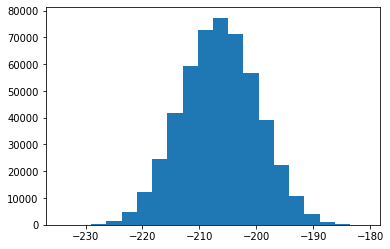

In [68]:
intervals = get_intervals(X)
    
plt.hist(intervals, bins=20)
plt.show()

### Ацэнкі матчакання, дысперсіі, СКА

In [69]:
print_m_D_sigma(find_m(X),
                find_D(X, find_m(X)))

m* = -205.01881512124393
D* = 49.14748069232002
sigma* = 7.010526420485128


## Экспаненцыяльнае размеркаванне

### Уваходныя параметры

In [45]:
lyambda = int(input())

9


### Фармаванне размеркавання

In [46]:
X = []
generic = get_generic(50093, 50101, 50111)

for i in range(len(generic)):
    X.append((-1)*math.log(generic[i]) / lyambda)

### Гістаграма

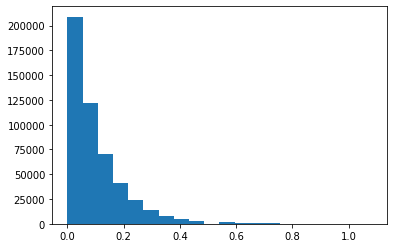

In [47]:
intervals = get_intervals(X)
    
plt.hist(intervals, bins=20)
plt.show()

### Ацэнкі матчакання, дысперсіі, СКА

In [49]:
print_m_D_sigma(find_m(X),
                find_D(X, find_m(X)))

m* = 0.11110289834532953
D* = 0.012329689396202569
sigma* = 0.11103913452563725


## Гама-размеркаванне

### Уваходныя параметры

In [50]:
myu, lyambda = input().split(" ")
myu = int(myu)
lyambda = int(lyambda)

10 4


### Фармаванне размеркавання

In [51]:
X = []

for i in range(len(generic) // myu):
    mul = 1
    for j in range(myu):
        mul *= generic[i*myu + j]
    X.append((-1)*math.log(mul) / lyambda)

### Гістаграма

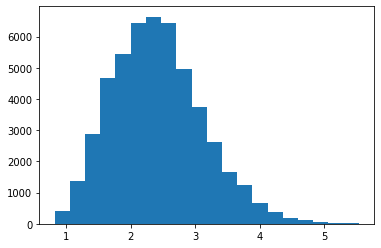

In [52]:
intervals = get_intervals(X)
    
plt.hist(intervals, bins=20)
plt.show()

### Ацэнкі матчакання, дысперсіі, СКА

In [53]:
print_m_D_sigma(find_m(X),
                find_D(X, find_m(X)))

m* = 2.4998152127700326
D* = 0.550282712174601
sigma* = 0.7418104287313579


## Трохвугольнае размеркаванне

### Уваходныя параметры

In [54]:
a, b = input().split(" ")
a = int(a)
b = int(b)

-3 2


### Фармаванне размеркавання, выкарыстоўваючы максімум  

In [55]:
X = []
generic_1 = get_generic(50093, 50101, 50111)
generic_2 = get_generic(61379, 61381, 61403)

for i in range(len(generic)):
    X.append(a + (b - a) * max(generic_1[i], generic_2[i]))

### Гістаграма

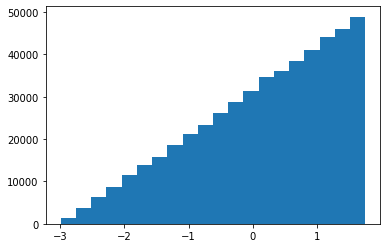

In [56]:
intervals = get_intervals(X)
    
plt.hist(intervals, bins=20)
plt.show()

### Ацэнкі матчакання, дысперсіі, СКА

In [57]:
print_m_D_sigma(find_m(X),
                find_D(X, find_m(X)))

m* = 0.3359718486471388
D* = 1.3854931212573096
sigma* = 1.1770697180954532


### Фармаванне размеркавання, выкарыстоўваючы мінімум 

In [58]:
X = []
generic_1 = get_generic(50093, 50101, 50111)
generic_2 = get_generic(61379, 61381, 61403)

for i in range(len(generic)):
    X.append(a + (b - a) * min(generic_1[i], generic_2[i]))

### Гістаграма

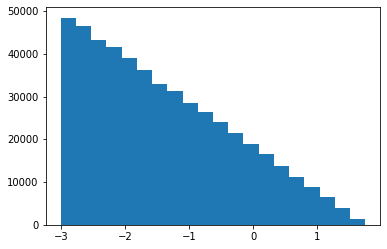

In [59]:
intervals = get_intervals(X)
    
plt.hist(intervals, bins=20)
plt.show()

### Ацэнкі матчакання, дысперсіі, СКА

In [60]:
print_m_D_sigma(find_m(X),
                find_D(X, find_m(X)))

m* = -1.3297510843039093
D* = 1.3937066616511813
sigma* = 1.1805535403577345


## Размеркаванне Сімпсона

### Уваходныя параметры

In [61]:
a, b = input().split(" ")
a = int(a)
b = int(b)

-5 6


### Фармаванне размеркавання

In [62]:
X = []
generic_1 = get_generic(50093, 50101, 50111)
generic_2 = get_generic(61379, 61381, 61403)

for i in range(len(generic)):
    X.append(a + (b - a) / 2 * (generic_1[i] + generic_2[i]))

### Гістаграма

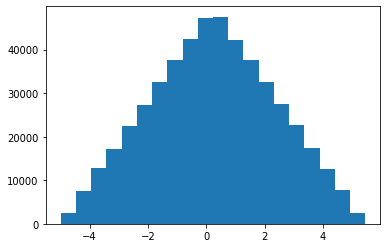

In [63]:
intervals = get_intervals(X)
    
plt.hist(intervals, bins=20)
plt.show()

### Ацэнкі матчакання, дысперсіі, СКА

In [64]:
print_m_D_sigma(find_m(X),
                find_D(X, find_m(X)))

m* = 0.5068428407775202
D* = 5.04530953345756
sigma* = 2.2461766478746856
